In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sn
from sklearn.linear_model import LinearRegression

In [68]:
# Dataset used : https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db

# Importing the dataset
spotify = pd.read_csv('/Users/lamad/Downloads/Spotify.csv')

In [57]:
#EDA
spotify.sample(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
166545,Rock,Breaking Benjamin,The Diary of Jane - Single Version,0faXHILILebCGnJBPU6KJJ,70,0.000059,0.391,200547,0.963,0.068900,A#,0.1400,-4.378,Minor,0.0773,167.065,4/4,0.364
207712,World,Hillsong UNITED,Mighty To Save - Live,2XVluRr8S9WV0ku8gH05hP,48,0.113000,0.327,303800,0.776,0.000007,A,0.6550,-6.675,Major,0.0550,150.880,4/4,0.149
175660,Comedy,Ryan Sickler,Living With A Woman,2pHTr5atnyWU2HY3BcPPdX,13,0.751000,0.382,152185,0.894,0.000000,F,0.7450,-8.084,Major,0.9490,199.614,5/4,0.474
97518,Children’s Music,Trevor Daniel,Wild,3EpHSpT2YH5maBzBJqtkcB,53,0.073700,0.642,186000,0.630,0.003710,D,0.1970,-7.371,Major,0.0362,160.024,4/4,0.205
174828,Comedy,Jerry Seinfeld,First Tonight Show Shot,7ykCob74vKfpc4ECA3nLCV,15,0.928000,0.709,245707,0.135,0.000000,D,0.1460,-18.512,Minor,0.8990,132.185,4/4,0.325
71029,Blues,Good Rockin' Charles,I Wish I Had Somebody,1jmUDgvrdOKpz1JxlEH7Qz,25,0.752000,0.566,286271,0.251,0.818000,C,0.0764,-17.183,Major,0.0298,96.721,4/4,0.644
9905,Alternative,My Darkest Days,Porn Star Dancing - Bonus Track,0sQ3DlfuQZozaOnAS1r4yG,44,0.006020,0.595,207120,0.905,0.000000,D,0.2380,-3.920,Major,0.0571,160.126,4/4,0.475
29380,Anime,Yasuharu Takanashi,Happy no Theme,44SHNMQEMP4EadtoIJQOOd,27,0.792000,0.713,91920,0.355,0.005770,D,0.1640,-9.877,Major,0.0433,114.008,4/4,0.714
153922,Rock,Deftones,Back To School - Mini Maggit,0Qrb3L8JgreLBW8g4qyan9,58,0.000386,0.300,237360,0.986,0.000136,G#,0.0924,-3.022,Major,0.1070,85.117,4/4,0.256
101828,Children’s Music,Shinedown,Shed Some Light,15QtTgLOGHUxYSFLQ2y5UW,47,0.292000,0.530,221720,0.372,0.000000,F#,0.1210,-8.603,Major,0.0301,117.780,4/4,0.218


In [58]:
print(spotify.shape)
print(spotify.dtypes)

(232725, 18)
genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object


In [59]:
#Numeric Columns
spotify_numeric = spotify.select_dtypes(include=[np.number])
numeric_cols = spotify_numeric.columns.values
print(numeric_cols)

['popularity' 'acousticness' 'danceability' 'duration_ms' 'energy'
 'instrumentalness' 'liveness' 'loudness' 'speechiness' 'tempo' 'valence']


In [60]:
spotify.describe(include='all')

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,232725,232725,232725,232725,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725,232725.000000,232725.000000,232725,232725.000000,232725.000000,232725,232725.000000
unique,27,14564,148615,176774,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,NaN,5,NaN
top,Comedy,Giuseppe Verdi,Home,3R73Y7X53MIQZWnKloWq5i,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,Major,NaN,NaN,4/4,NaN
freq,9681,1394,100,8,NaN,NaN,NaN,NaN,NaN,NaN,27583,NaN,NaN,151744,NaN,NaN,200760,NaN
mean,NaN,NaN,NaN,NaN,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,NaN,0.215009,-9.569885,NaN,0.120765,117.666585,NaN,0.454917
std,NaN,NaN,NaN,NaN,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,NaN,0.198273,5.998204,NaN,0.185518,30.898907,NaN,0.260065
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,NaN,0.009670,-52.457000,NaN,0.022200,30.379000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,NaN,0.097400,-11.771000,NaN,0.036700,92.959000,NaN,0.237000
50%,NaN,NaN,NaN,NaN,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,NaN,0.128000,-7.762000,NaN,0.050100,115.778000,NaN,0.444000
75%,NaN,NaN,NaN,NaN,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,NaN,0.264000,-5.501000,NaN,0.105000,139.054000,NaN,0.660000


In [61]:
#Null values
spotify_non_numeric = spotify.select_dtypes(exclude=[np.number])
non_numeric_cols = spotify_non_numeric.columns.values
cols = spotify.columns
for col in spotify.columns:
    pct_missing = np.mean(m[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

genre - 0%
artist_name - 0%
track_name - 0%
track_id - 0%
popularity - 0%
acousticness - 0%
danceability - 0%
duration_ms - 0%
energy - 0%
instrumentalness - 0%
key - 0%
liveness - 0%
loudness - 0%
mode - 0%
speechiness - 0%
tempo - 0%
time_signature - 0%
valence - 0%


In [62]:
#Duplicate values
duplicate = spotify[spotify.duplicated('track_id')]
duplicate

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1348,Alternative,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.07160,0.710,217813,0.710,0.000001,C,0.2060,-2.474,Major,0.0579,169.944,4/4,0.700
1385,Alternative,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,61,0.97500,0.377,334570,0.255,0.000208,E,0.1020,-11.165,Minor,0.0387,125.004,5/4,0.370
1452,Alternative,Frank Ocean,Bad Religion,2pMPWE7PJH1PizfgGRMnR9,56,0.77900,0.276,175453,0.358,0.000003,A,0.0728,-7.684,Major,0.0443,81.977,4/4,0.130
1554,Alternative,Steve Lacy,Some,4riDfclV7kPDT9D58FpmHd,58,0.00548,0.784,118393,0.554,0.254000,G,0.0995,-6.417,Major,0.0300,104.010,4/4,0.634
1634,Alternative,tobi lou,Buff Baby,1F1QmI8TMHir9SUFrooq5F,59,0.19000,0.736,215385,0.643,0.000000,F,0.1060,-8.636,Major,0.0461,156.002,4/4,0.599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232715,Soul,Emily King,Down,5cA0vB8c9FMOVDWyJHgf26,42,0.55000,0.394,281853,0.346,0.000002,E,0.1290,-13.617,Major,0.0635,90.831,4/4,0.436
232718,Soul,Muddy Waters,I Just Want To Make Love To You - Electric Mud...,2HFczeynfKGiM9KF2z2K7K,43,0.01360,0.294,258267,0.739,0.004820,C,0.1380,-7.167,Major,0.0434,176.402,4/4,0.945
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813


In [63]:
#Dropping Duplicate values
spotify.drop_duplicates(subset ="track_id",keep = "first", inplace = True)
duplicate = spotify[spotify.duplicated('track_id')]
duplicate

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence


In [64]:
#Inconsistancies
print(spotify.time_signature.value_counts())
#dropping row woth inconsistant values
spotify= spotify[spotify.time_signature != "0/4"]

4/4    149187
3/4     20806
5/4      4430
1/4      2345
0/4         6
Name: time_signature, dtype: int64


In [65]:
#time_signature after cleaning
print(spotify.time_signature.value_counts())

4/4    149187
3/4     20806
5/4      4430
1/4      2345
Name: time_signature, dtype: int64


In [66]:
print(spotify.genre.value_counts())
#merging the two genres together 
spotify = spotify.replace({'genre':{"Children’s Music":"Children's Music"}})

Comedy              9673
Electronic          9149
Alternative         9095
Anime               8935
Classical           8711
Reggae              8687
Reggaeton           8549
Blues               8496
Soundtrack          8480
Opera               8277
Folk                8048
Jazz                8039
Ska                 8017
Dance               7981
World               7972
Movie               7802
Hip-Hop             7413
Country             7383
Children's Music    5402
R&B                 5353
Soul                4430
Indie               3318
Pop                 2417
Rock                2227
Rap                 1456
Children’s Music    1339
A Capella            119
Name: genre, dtype: int64


In [67]:
#genre after cleaning
print(spotify.genre.value_counts())

Comedy              9673
Electronic          9149
Alternative         9095
Anime               8935
Classical           8711
Reggae              8687
Reggaeton           8549
Blues               8496
Soundtrack          8480
Opera               8277
Folk                8048
Jazz                8039
Ska                 8017
Dance               7981
World               7972
Movie               7802
Hip-Hop             7413
Country             7383
Children's Music    6741
R&B                 5353
Soul                4430
Indie               3318
Pop                 2417
Rock                2227
Rap                 1456
A Capella            119
Name: genre, dtype: int64


In [21]:
#Descriptive Statistics

In [33]:
corrMatrix = spotify_numeric.corr()
print (corrMatrix)

                  popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.359096      0.222026     0.019345   
acousticness       -0.359096      1.000000     -0.378988     0.010297   
danceability        0.222026     -0.378988      1.000000    -0.124262   
duration_ms         0.019345      0.010297     -0.124262     1.000000   
energy              0.234046     -0.729874      0.365197    -0.029976   
instrumentalness   -0.147892      0.305222     -0.370872     0.069603   
liveness           -0.161745      0.078870     -0.026911     0.023588   
loudness            0.321588     -0.693138      0.460512    -0.042940   
speechiness        -0.162108      0.172664      0.133144    -0.011592   
tempo               0.082826     -0.260818      0.046782    -0.030052   
valence             0.048796     -0.348543      0.587584    -0.146985   

                    energy  instrumentalness  liveness  loudness  speechiness  \
popularity        0.234046         -0.1478

In [34]:
spotify.groupby(['genre'], sort=True).mean()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
genre,,,,,,,,,,,
A Capella,9.302521,0.829941,0.412252,204467.697479,0.250313,0.007491,0.136924,-13.660387,0.042414,111.518950,0.328724
Alternative,50.257944,0.160094,0.541132,233011.286751,0.713933,0.060814,0.197352,-6.516320,0.089268,122.520002,0.448935
Anime,24.256184,0.286874,0.472091,229942.980638,0.665320,0.280623,0.192378,-7.918570,0.065096,126.633144,0.441682
Blues,33.683851,0.333238,0.528929,252513.600047,0.603349,0.097779,0.235521,-9.094969,0.062066,121.176278,0.580323
Children's Music,13.791426,0.505127,0.663224,160547.092271,0.459611,0.121135,0.171810,-10.594825,0.108190,121.409066,0.628799
Classical,29.320170,0.868551,0.306628,312948.375043,0.175302,0.613184,0.158570,-21.752324,0.051468,104.497824,0.215561
Comedy,21.318205,0.793434,0.559023,235336.734002,0.676184,0.000574,0.725095,-11.691928,0.854079,98.217071,0.412684
Country,44.248679,0.272274,0.575732,216862.719355,0.635351,0.005461,0.188754,-7.335405,0.048132,123.645266,0.534908
Dance,57.351209,0.154880,0.641977,224375.848515,0.696170,0.028611,0.186852,-6.020443,0.085190,120.705660,0.517678


In [55]:
spotify.describe(include='all')

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,176768,176768,176768,176768,176768.000000,176768.000000,176768.000000,1.767680e+05,176768.000000,176768.000000,176768,176768.000000,176768.000000,176768,176768.000000,176768.000000,176768,176768.000000
unique,26,14564,148394,176768,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,NaN,4,NaN
top,Comedy,Giuseppe Verdi,Home,2PiEowJlBmP5VxlyxMPS6T,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,Major,NaN,NaN,4/4,NaN
freq,9673,1311,68,1,NaN,NaN,NaN,NaN,NaN,NaN,20968,NaN,NaN,116614,NaN,NaN,149187,NaN
mean,NaN,NaN,NaN,NaN,36.273375,0.404121,0.541074,2.361271e+05,0.557036,0.172072,NaN,0.224530,-10.137261,NaN,0.127391,117.203793,NaN,0.451606
std,NaN,NaN,NaN,NaN,17.390940,0.366296,0.190385,1.305143e+05,0.275834,0.322936,NaN,0.211023,6.395240,NaN,0.204338,31.325309,NaN,0.267817
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,NaN,0.009670,-52.457000,NaN,0.022200,30.379000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,25.000000,0.045600,0.415000,1.782530e+05,0.344000,0.000000,NaN,0.097500,-12.850000,NaN,0.036800,92.006000,NaN,0.222000
50%,NaN,NaN,NaN,NaN,37.000000,0.288000,0.558000,2.194530e+05,0.592000,0.000070,NaN,0.130000,-8.191000,NaN,0.049400,115.006500,NaN,0.440000
75%,NaN,NaN,NaN,NaN,49.000000,0.791000,0.683000,2.685470e+05,0.789000,0.090800,NaN,0.277000,-5.631000,NaN,0.102000,138.799250,NaN,0.667000


<AxesSubplot:xlabel='popularity', ylabel='genre'>

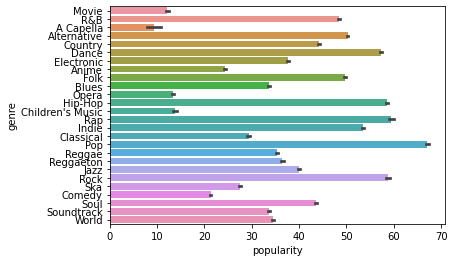

In [35]:
#visualization
sn.barplot(x=spotify['popularity'],y=spotify['genre'], orient='h')

<ipython-input-36-53761237df89>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  spotify.hist(ax=ax)


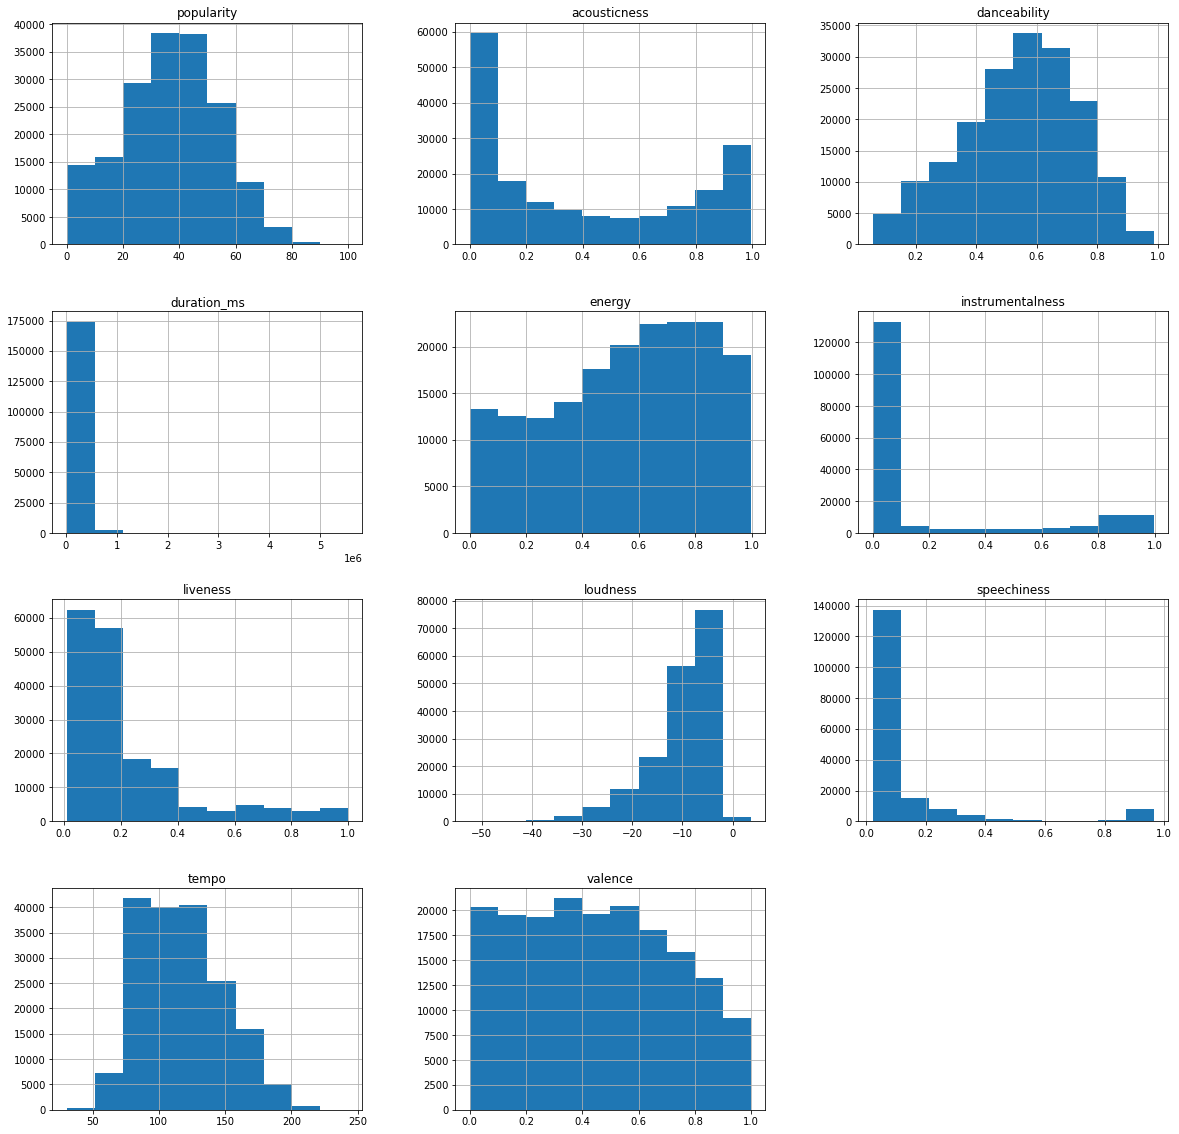

In [36]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
spotify.hist(ax=ax)
plt.show()

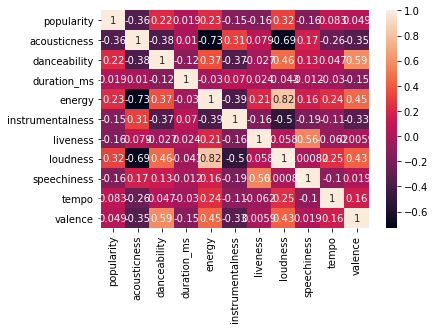

In [37]:
corrMatrix = spotify_numeric.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

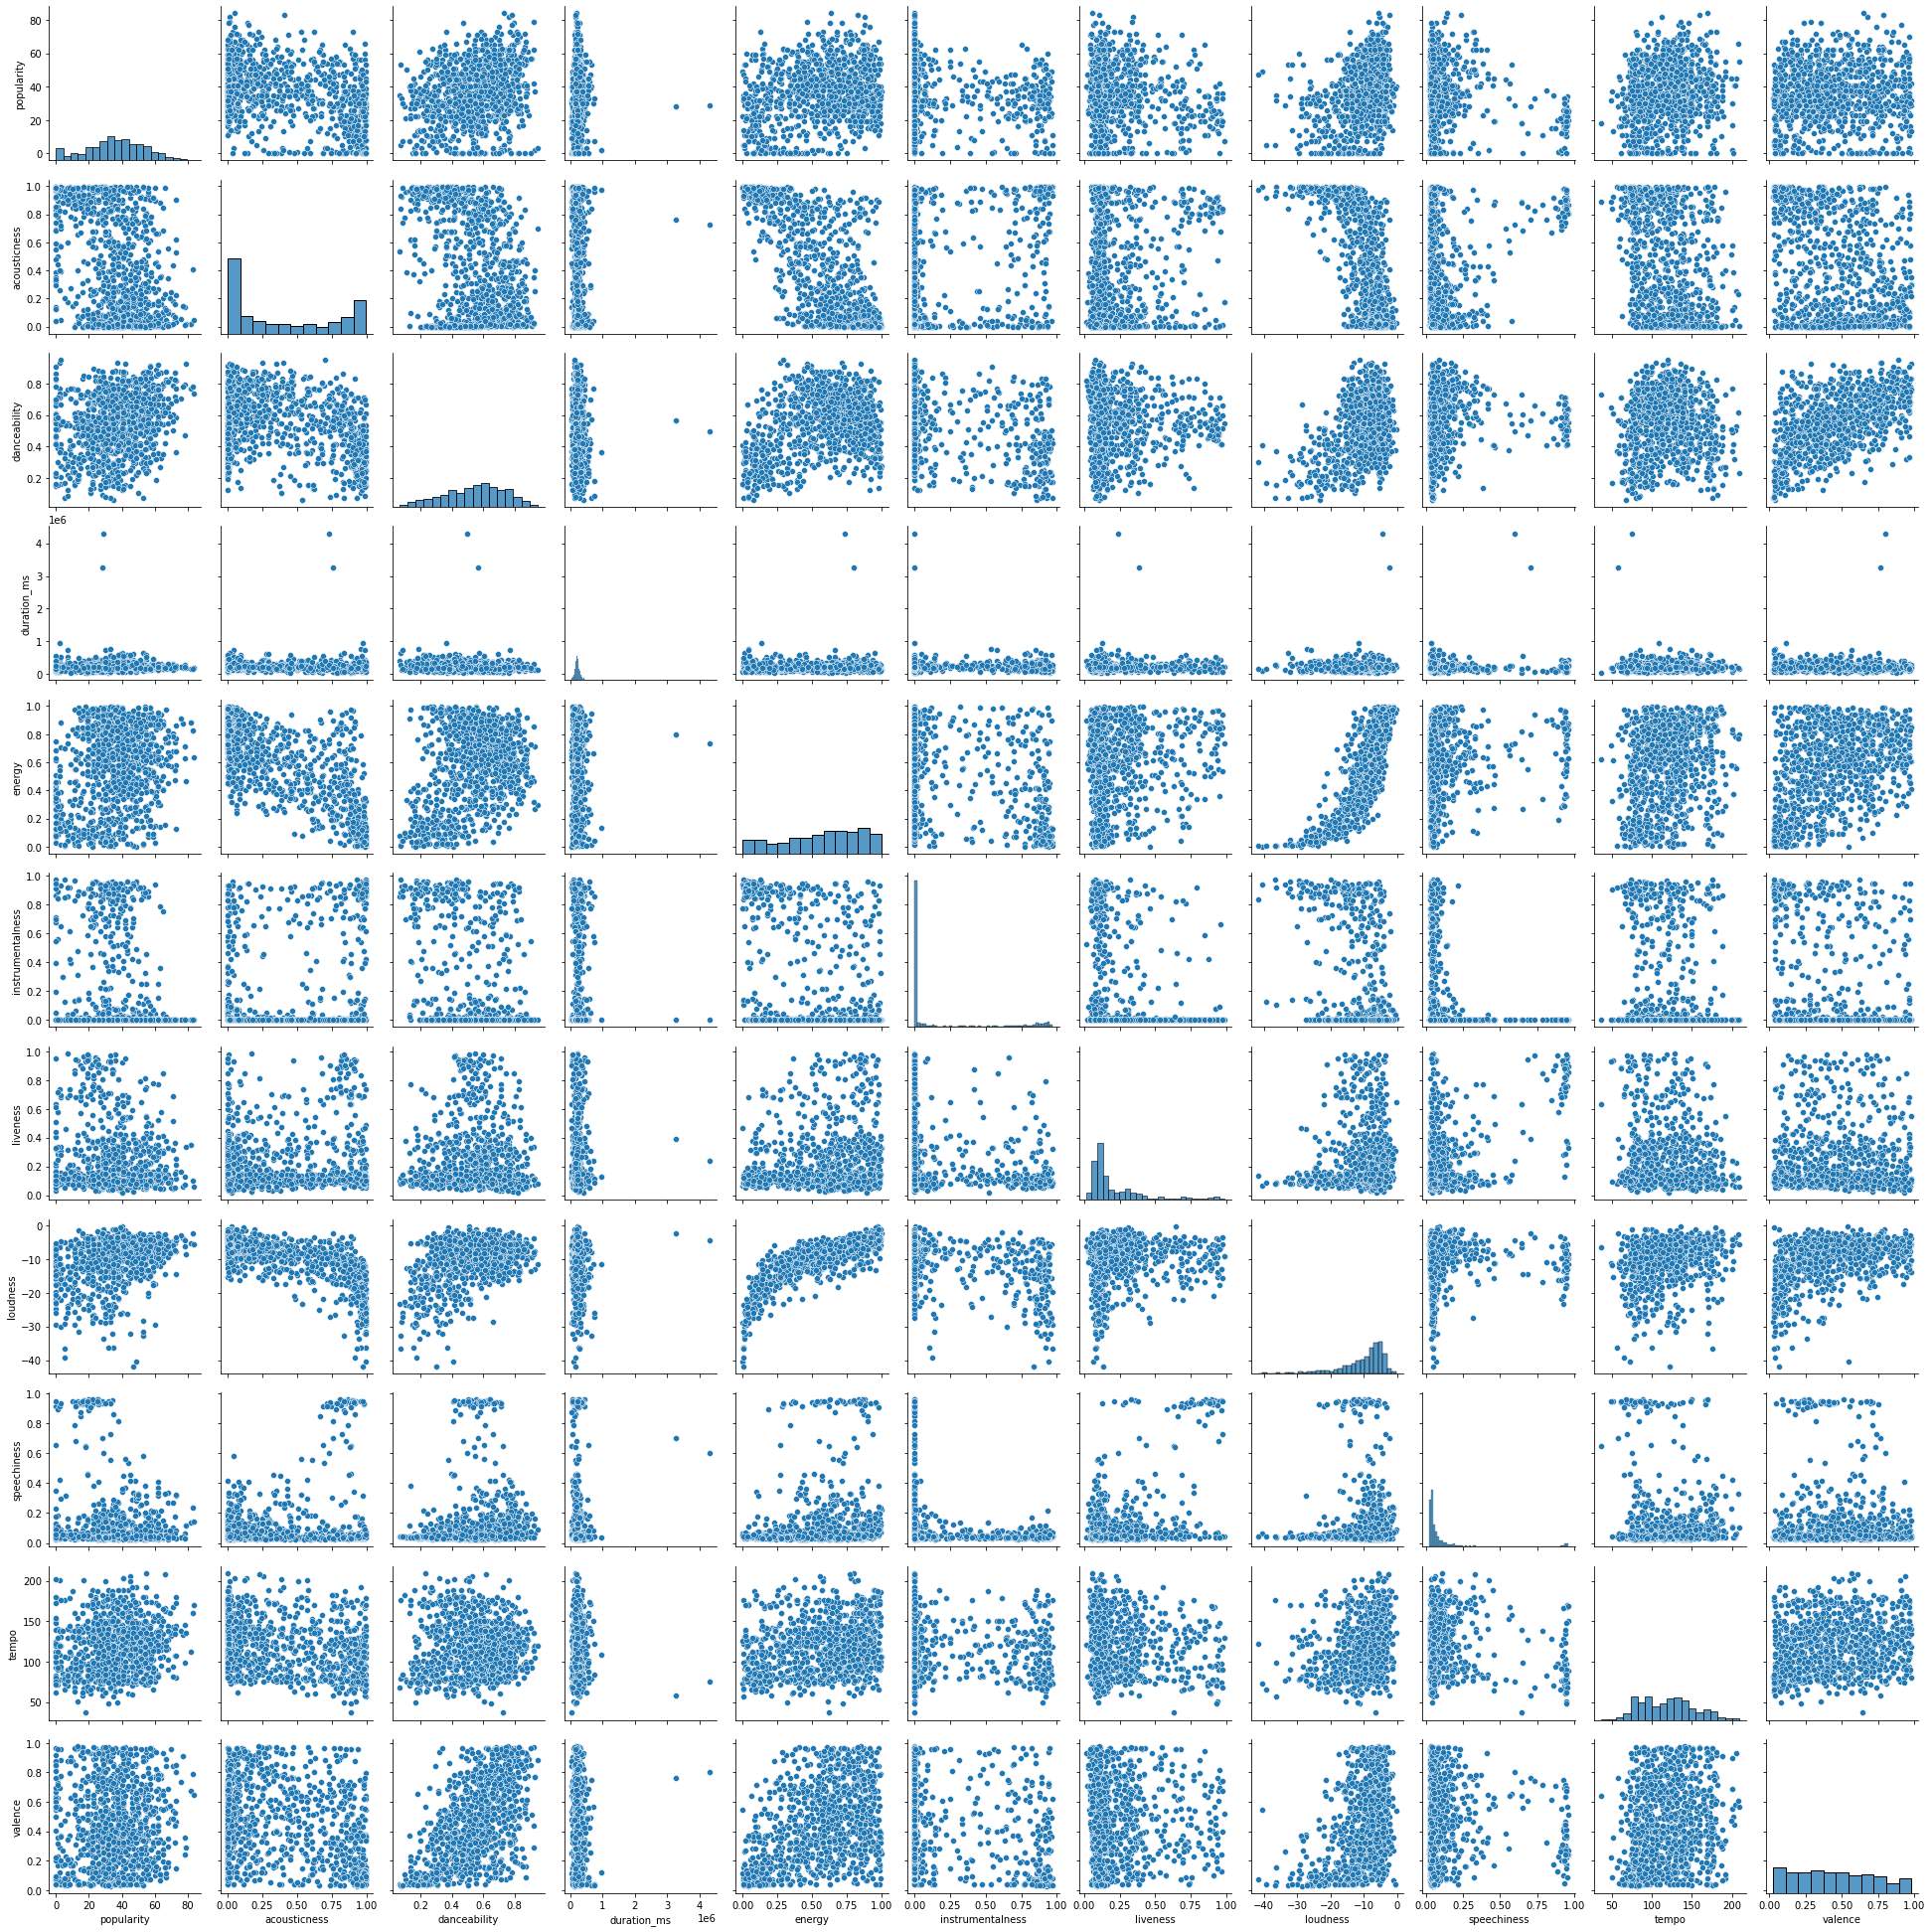

In [38]:
#taking a sample of the data to make the plot readable
spotify_sample=spotify.sample(1000)
sn.pairplot(spotify_sample)

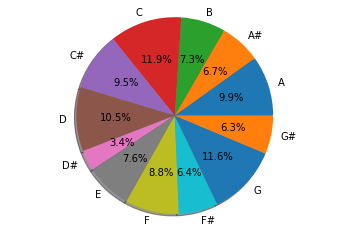

In [39]:
#visualization
labels = spotify['key'].astype('category').cat.categories.tolist()
counts = spotify['key'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [71]:
#Data Split
X=spotify.loc[:,['loudness', 'acousticness', 'danceability' , 'popularity', 'instrumentalness', 'liveness' ,'speechiness', 'tempo' ,'valence']]
y=spotify.loc[:,'energy'] 

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [72]:
#Linear Regression
reg = LinearRegression().fit(X_train, y_train)
print("Intercept    :  ",reg.intercept_)
print("Codeffecints :  \n",reg.coef_)
y_pred=reg.predict(X_test)
print("Predicted Values:  \n",y_pred[:5],"\n")
print("Actual Values:  \n",y_test[0:5])
print("R-Squared of Linear regression model   :  ",reg.score(X_train, y_train))
print("R-Squared on the Test dataset          :  ",r2_score(y_test, y_pred))

Intercept    :   0.8941795025704755
Codeffecints :  
 [ 2.60844969e-02 -2.81608385e-01 -2.22122952e-01 -3.18165114e-04
  7.09675780e-02  1.29899128e-01  2.60602471e-01  1.11284222e-04
  1.83151622e-01]
Predicted Values:  
 [ 0.65365806  0.51389586  0.53128884 -0.10898405  0.29355315] 

Actual Values:  
 134848    0.6050
43959     0.3720
135390    0.5750
104126    0.0609
58631     0.3820
Name: energy, dtype: float64
R-Squared of Linear regression model   :   0.7988361701033454
R-Squared on the Test dataset          :   0.8003195605194704


LinearRegression()
